<a href="https://colab.research.google.com/github/vsolodkyi/NeuralNetworks_SkillBox/blob/main/module_3/keras_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика по определению моделей в Keras

В каждом из заданий ниже, реализуйте модель, повторяющую архитектуру на приложенной картинке. При определении моделей, можете использовать как Sequential так и Functional API.

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np

## Задание 1

Реализуйте модель описанную ниже. Активацию последнего слоя сделайте "softmax".

<img src="https://drive.google.com/uc?export=view&id=1QCKcPlmguNNXPvUQnUaphcfOTWvQKzEW" width=200>
<img src="https://drive.google.com/uc?export=view&id=1r6DoTrn8Pe2RKuPT3RM9rR8Xc2X3WNVe" width=400>


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 44        
                                                                 
 dense_18 (Dense)            (None, 8)                 40        
                                                                 
 dense_19 (Dense)            (None, 16)                144       
                                                                 
 dense_20 (Dense)            (None, 3)                 51        
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


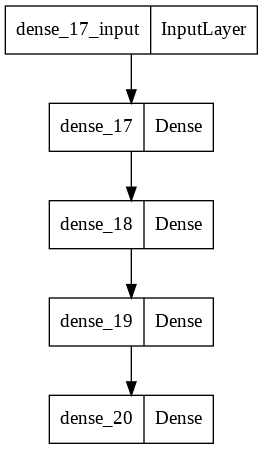

In [6]:
# <YOUR CODE STARTS HERE >
model = tf.keras.Sequential()
model.add(Dense(units=4, input_shape=(10,), activation='relu', name='dense_17'))
model.add(Dense(units=8, activation='relu', name='dense_18'))
model.add(Dense(units=16, activation='relu', name='dense_19'))
model.add(Dense(units=3, activation='softmax', name='dense_20'))





# <YOUR CODE ENDS HERE >
model.summary()
tf.keras.utils.plot_model(model, show_shapes=False)

In [7]:
output = model(np.ones((3, 10)))
assert np.allclose(output.numpy().sum(1),  np.ones(3)), "Did you forget softmax in the last layer?"
assert model.count_params() == 279, "Wrong params number"
print("Simple tests passed")

Simple tests passed


## Задание 2

Реализуйте модель описанную ниже.

<img src="https://lh3.googleusercontent.com/Aa_RCQNbksP9j27Br0kbq-Aj_yWHW3fofmaZj6jOm8xBLgWrEn60MbxVBkfZipLJ5mI3LAMC9wdhv08i76oKY6cQzUdYVHyRzLV4dZ8Yw-TIC6Y82gLe1zmdwzpX2JkFmo-nJy6YPLGiZuqkjKJlTdtHdFdDuIp_akK2fSMEMf85u3_3N-Gx6XSTxaQsCX5PL8aWlNeDl5rpHhmQYBTe1TR2-EDsAMgz4CLBMwyhVPJwjBR57WOBw14NPp6RrayuaPSltd9qbvQG2236WKqyL0w__y6tR6Vg7WMtUm4SKrPbTSUUyEEvU1hH6Z6yQpgyRRXecdupmTyx3FySqgERRVIqEb-JNoLppqzcaBEHDKdi0I7tQuuKXVyjSq5P02McLEwR7ej3dKVC8R3EsFDZV8uVLWJQSdpvInhp5d0fGb5u-UOfRuJ1X_4s2A6BJPbWbj4NyQAWPFem02A2Ya4CpzgDbMnjiAmlt_-JavcPCi7UALu6mH_RzPgNkzlrSqEMHpdBnVs6vhtEQGoZU1kxARvZxfBnbXTudg0IYjZ-LBKEfEFRwN3pbC3A9xnPS_-LRXcvAy45VSgH_JgPV4PpBFwo-xVg6O1RUhbOBuR8_a9OOyLd2zN8NaLO4e4bxq8pHD9mIXXBrxxCK76pjO5Vs2m03h-U7o6VTci3Fr9U5f2rF4ejP_7pNtSwfZ3RRA=w646-h220-no?authuser=0" width=400>
<img src="https://drive.google.com/uc?export=view&id=1vR3XfyYEpSmgEXZoLGY_FfWRwgOiefoj" width=300>


*Кстати, такая кострукция не лишена смысла -- в следующем модуле мы увидим как она помогла совершить прорыв в классификации изображений. Она носит название residual block*

Подсказка: на последнем слое используйте метод `Add()` класса layers, на вход которому нужно подать массик из `input_layer` и `l1_output`.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input (InputLayer)             [(None, 10)]         0           []                               
                                                                                                  
 Layer1 (Dense)                 (None, 10)           110         ['Input[0][0]']                  
                                                                                                  
 add_2 (Add)                    (None, 10)           0           ['Layer1[0][0]',                 
                                                                  'Input[0][0]']                  
                                                                                                  
Total params: 110
Trainable params: 110
Non-trainable params: 0
______________________________

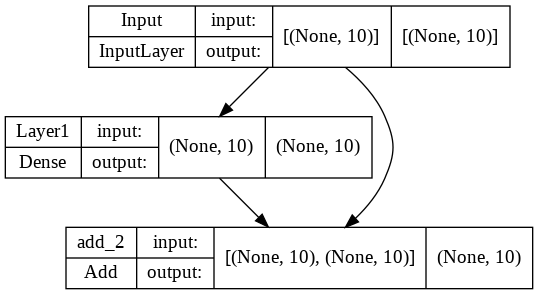

In [10]:
# <YOUR CODE STARTS HERE >

input_layer = tf.keras.Input(shape=(10,), name='Input')
l1 = Dense(units=10, name='Layer1')
l1_output = l1(input_layer)
l2 = tf.keras.layers.Add(name="add_2")([l1_output, input_layer])
model = tf.keras.Model(inputs=input_layer, outputs=l2)

# <YOUR CODE ENDS HERE >
model.summary()
assert model.count_params() == 110, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=True)

## Задание 3

Реализуйте модель описанную ниже. Вам пригодится tf.keras.layers.Concatenate.

<img src="https://drive.google.com/uc?export=view&id=1LvsTd2a0HW-duuv3UyxCBLmERpqQQweU" width=450>
<img src="https://drive.google.com/uc?export=view&id=18IMatPWKG-0T9gisyJ_k465mospO_xow" width=400>


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLayer (InputLayer)        [(None, 10)]         0           []                               
                                                                                                  
 Layer1 (Dense)                 (None, 10)           110         ['InputLayer[0][0]']             
                                                                                                  
 Layer2 (Dense)                 (None, 10)           110         ['InputLayer[0][0]']             
                                                                                                  
 Layer3 (Dense)                 (None, 10)           110         ['Layer1[0][0]']                 
                                                                                            

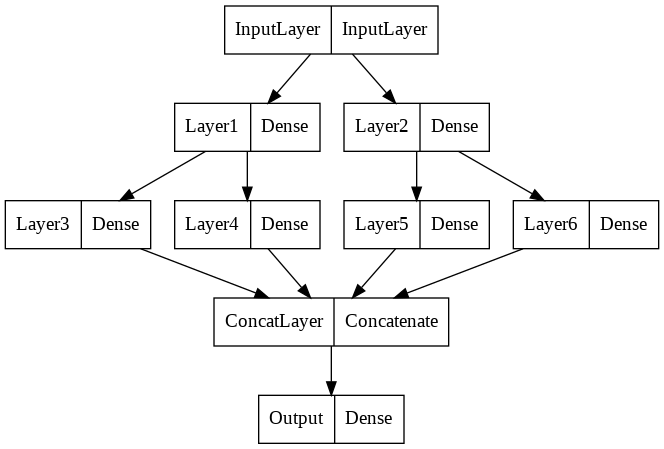

In [24]:
# <YOUR CODE STARTS HERE >

input_layer = tf.keras.layers.Input(shape=(10,), name='InputLayer')
l1 = Dense(units=10, name='Layer1', activation='relu')
l1_output = l1(input_layer)
l2 = Dense(units=10, name='Layer2', activation='relu')
l2_output = l2(input_layer)
l3_output = Dense(units=10, name='Layer3', activation='relu')(l1_output)
l4_output = Dense(units=10, name='Layer4', activation='relu')(l1_output)
l5_output = Dense(units=10, name='Layer5', activation='relu')(l2_output)
l6_output = Dense(units=10, name='Layer6', activation='relu')(l2_output)
l7 = tf.keras.layers.Concatenate(name="ConcatLayer")([l3_output, l4_output, l5_output, l6_output])
l8_output = Dense(units=3, activation='softmax', name='Output')(l7)

model = tf.keras.Model(inputs=input_layer, outputs=l8_output)

# <YOUR CODE ENDS HERE >

model.summary()
assert model.count_params() == 783, "Wrong params number"
print("Simple tests passed")
tf.keras.utils.plot_model(model, show_shapes=False)

In [17]:
l1_output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'Layer1')>